Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margi

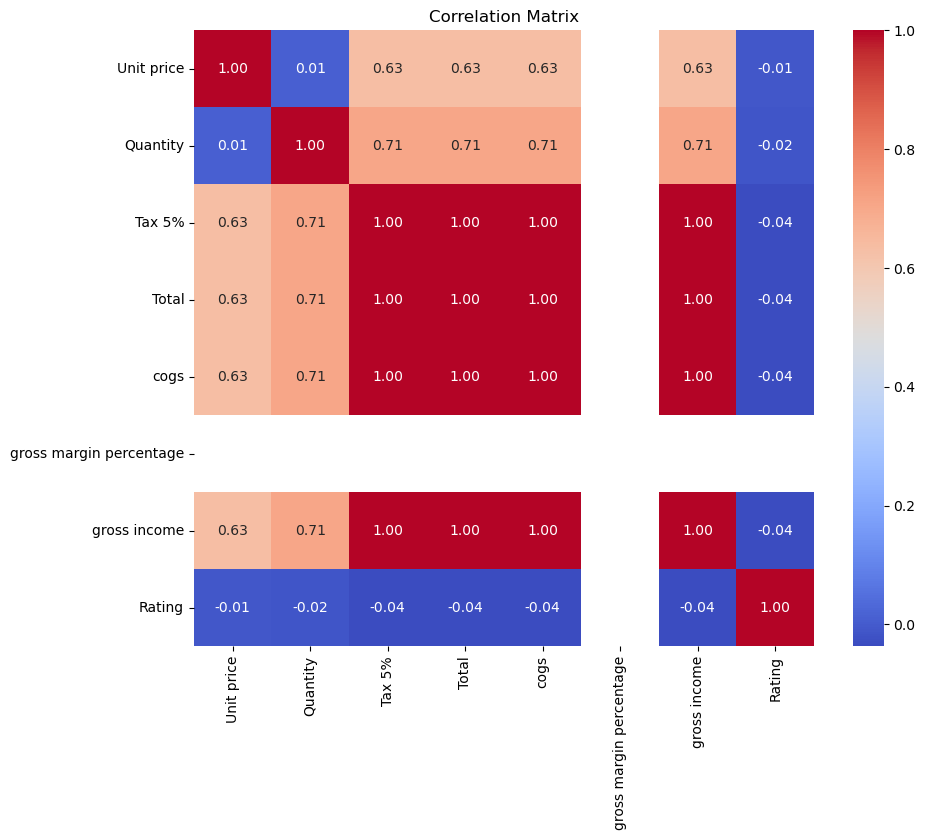

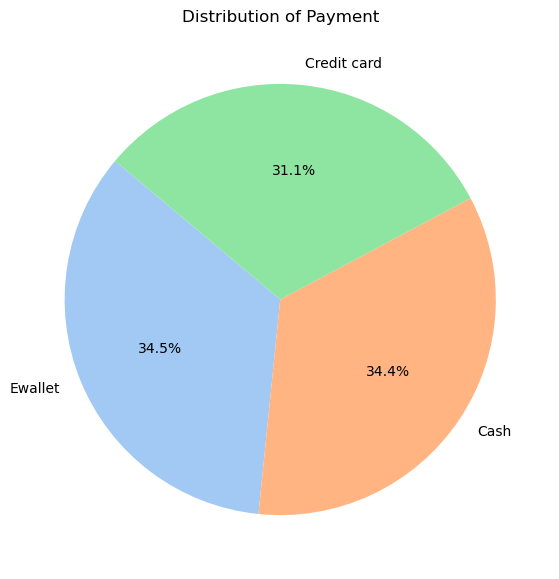

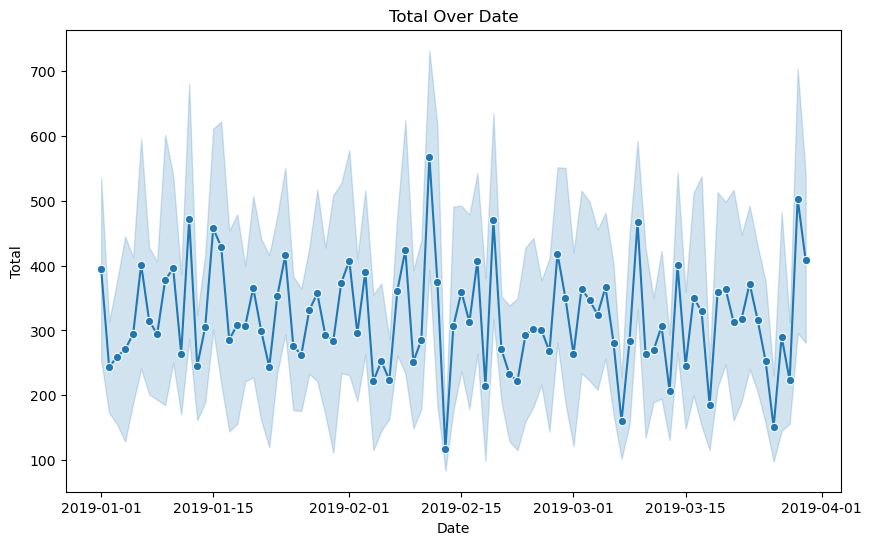

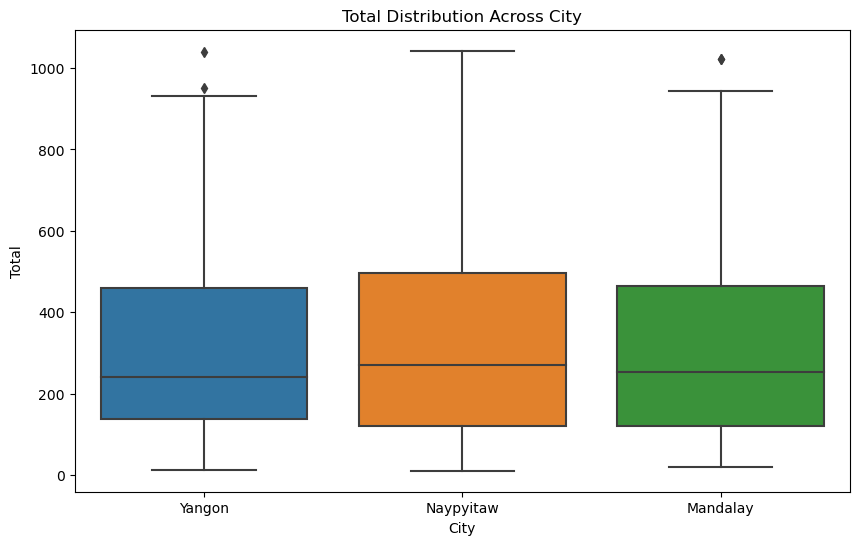

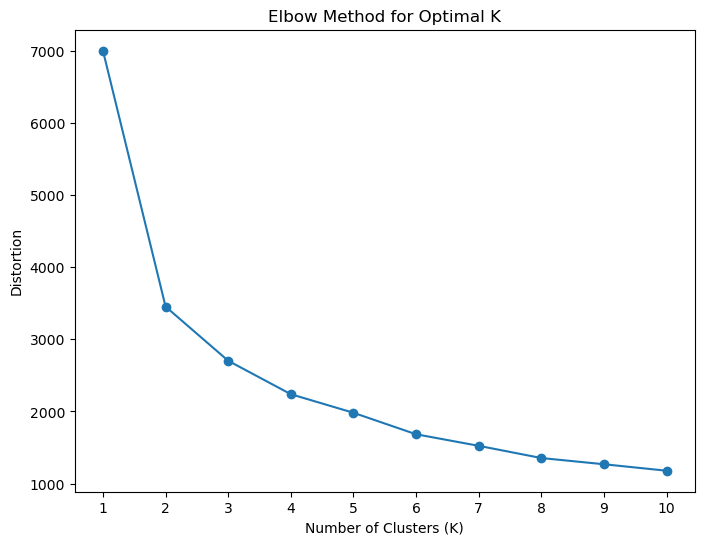

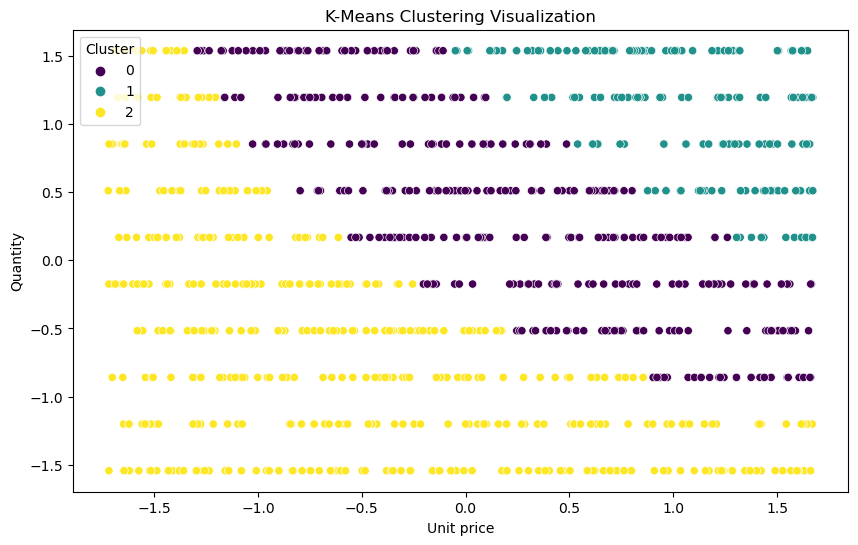

Mean Squared Error for Total prediction: 6636.96


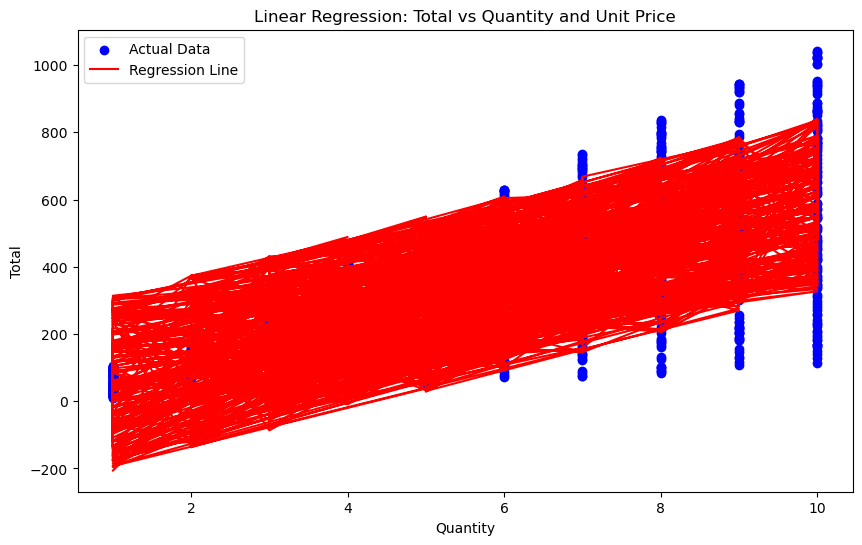

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Displaying the first few rows to understand the data
print("\nFirst Few Rows of Data:")
print(df.head())

# Data Cleaning: Handling missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Correlation Matrix: Selecting numeric columns and visualizing their correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 1. Pie Chart: Distribution of payment method
def create_pie_plot(data, column_name):
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Example: Pie chart for 'Payment' column
create_pie_plot(df, 'Payment')

# 2. Line Plot: Sales over time
def create_line_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=x_column, y=y_column, marker='o')
    plt.title(f'{y_column} Over {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example: Line plot for 'Date' vs 'Total'
create_line_plot(df, 'Date', 'Total')

# 3. Box Plot: Distribution of 'Total' sales by 'City'
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(f'{y_column} Distribution Across {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example: Box plot for 'City' vs 'Total'
create_box_plot(df, 'City', 'Total')

# 4. Elbow Method for K-Means clustering to find the optimal number of clusters
def plot_elbow_method(data, feature_columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.xticks(K)
    plt.show()

plot_elbow_method(df, numeric_columns)

# 5. K-Means Clustering: Perform K-Means clustering and visualize the clusters
def perform_kmeans(data, feature_columns, n_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualizing the clustering (using the first two features for simplicity)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('K-Means Clustering Visualization')
    plt.xlabel(feature_columns[0])
    plt.ylabel(feature_columns[1])
    plt.show()

perform_kmeans(df, numeric_columns, n_clusters=3)

# 6. Linear Regression: Predicting 'Total' based on 'Quantity' and 'Unit Price'
def perform_linear_regression(data, x_columns, y_column):
    X = data[x_columns]
    y = data[y_column]

    model = LinearRegression()
    model.fit(X, y)

    # Predictions and evaluation
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    print(f"Mean Squared Error for {y_column} prediction: {mse:.2f}")

    # Plotting the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Quantity'], y, color='blue', label='Actual Data')
    plt.plot(X['Quantity'], predictions, color='red', label='Regression Line')
    plt.title(f"Linear Regression: {y_column} vs Quantity and Unit Price")
    plt.xlabel('Quantity')
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

perform_linear_regression(df, ['Quantity', 'Unit price'], 'Total')  # Replace with relevant columns in your dataset

# Optionally, save the cleaned and processed data
df.to_csv("cleaned_supermarket_sales_data.csv", index=False)


In [4]:
#Descriptive Statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Cluster
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270,1.151000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000,0.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000,1.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000,2.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000,2.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,0.894986


In [5]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   
Cluster                   -0.374923 -0.469433 -0.533557 -0.533557 -0.533557   

                         gross margin percentage  gross income    Rating  \
Unit price                                   NaN      0.633962 -0.008778   
Quantity                            